In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rfpimp

import utils
from data_statistical_features import Segment, SegmentStatistical
import eda_utils

import os

plt.rcParams.update(utils.get_plt_settings())

save=True

/Users/zianor/.virtualenvs/venv/Bachelorarbeit/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load Data

In [2]:
df = pd.read_csv(utils.get_own_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10,
                                                 data_folder='data_patients'), index_col=False)
features = df.drop(Segment.get_feature_name_array(), axis='columns')
informative_inf = df[Segment.get_feature_name_array()]

df.columns = [col.replace("_", " ") for col in df.columns]
features.columns = [col.replace("_", " ") for col in features.columns]
informative_inf.columns = [col.replace("_", " ") for col in informative_inf.columns]

target = df['informative']
patient_id = df['patient id']

from ml_statistical_features import get_patient_split
x_train, x_test, y_train, y_test, groups_train, groups_test = get_patient_split(features, target, patient_id, test_size=0.33)
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

In [3]:
features.columns

Index(['mean', 'std', 'number zero crossings', 'kurtosis', 'skewness',
       'hf ratio acf', 'hf ratio data', 'hf diff acf', 'hf diff data',
       'abs energy', 'interval lengths std', 'interval lengths range',
       'sqi std', 'sqi min', 'sqi max', 'sqi median', 'sqi mean', 'peak range',
       'peak mean', 'peak std', 'template corr highest sqi mean',
       'template corr highest sqi std', 'template corr median sqi mean',
       'template corr median sqi std', 'interval means std',
       'interval stds std', 'interval ranges std', 'sqi coverage 03',
       'sqi coverage 04', 'sqi coverage 05'],
      dtype='object')

In [4]:
latex_names = {
    'error': '$E\\textsubscript{HR}$',
    'hf ratio data': '$\\texttt{ratio}\\textsubscript{data}$',
    'hf ratio acf': '$\\texttt{ratio}\\textsubscript{acf}$',
    'hf diff acf': '$\\texttt{diff}\\textsubscript{acf}$',
    'hf diff data': '$\\texttt{diff}\\textsubscript{data}$',
    'abs energy': '$E\\textsubscript{abs}$',
    'interval lengths std': '$\\text{IL}\\textsubscript{std}$',
    'interval lengths range': '$\\text{IL}\\textsubscript{range}$',
    'sqi mean': '$\\text{SQI}\\textsubscript{mean}$',
    'sqi median': '$\\text{SQI}\\textsubscript{median}$',
    'sqi min': '$\\text{SQI}\\textsubscript{min}$',
    'sqi std': '$\\text{SQI}\\textsubscript{std}$',
    'sqi max': '$\\text{SQI}\\textsubscript{max}$',
    'peak range': '$\\text{P}\\textsubscript{range}$',
    'peak mean': '$\\text{P}\\textsubscript{mean}$',
    'peak std': '$\\text{P}\\textsubscript{std}$',
    'template corr highest sqi mean': '$\\texttt{mean}\\textsubscript{T\\textsubscript{SQI}}$',
    'template corr highest sqi std': '$\\texttt{std}\\textsubscript{T\\textsubscript{SQI}}$',
    'template corr median sqi mean':'$\\texttt{mean}\\textsubscript{T\\textsubscript{median}}$',
    'template corr median sqi std': '$\\texttt{std}\\textsubscript{T\\textsubscript{median}}$',
    'interval means std': '$\\texttt{mean}\\textsubscript{std}$', 
    'interval stds std': '$\\texttt{std}\\textsubscript{std}$',
    'interval ranges std': '$\\texttt{range}\\textsubscript{std}$',
    'sqi coverage 03': '$C_{0{,}3}$',
    'sqi coverage 04': '$C_{0{,}4}$',
    'sqi coverage 05': '$C_{0{,}5}$'
}

# Correlation Heatmap

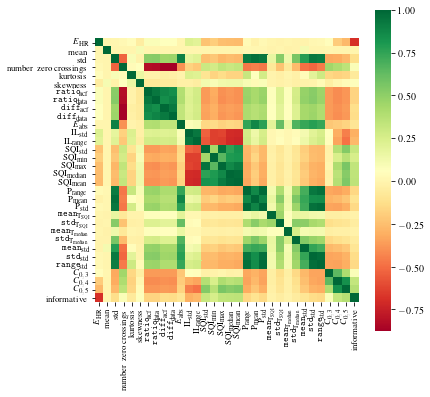

In [5]:
width, _ = utils.get_plt_big_size()
plt.figure(figsize=(width, width))

df_corr = df.drop(['brueser sqi', 'patient id', 'abs err', 'rel err', 'quality class',
                   'brueser coverage', 'bcg hr', 'ecg hr'], axis='columns')

df_corr.rename(columns=latex_names, inplace=True)

g = sns.heatmap(df_corr.loc[x_train.index].corr(), square=True, cmap ="RdYlGn",
            xticklabels=True, yticklabels=True)
g.set_xticklabels(g.get_xticklabels(), fontsize=9)
g.set_yticklabels(g.get_yticklabels(), fontsize=9)
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'corr-heatmap-own.pdf'), bbox_inches='tight',
                transparent=True, dpi=300)


In [6]:
corr_colls = eda_utils.get_correlated_columns(x_train, 0.95)
corr_colls

['sqi max',
 'sqi mean',
 'peak mean',
 'peak std',
 'interval stds std',
 'interval ranges std']

In [7]:
fdm = rfpimp.feature_dependence_matrix(x_train)

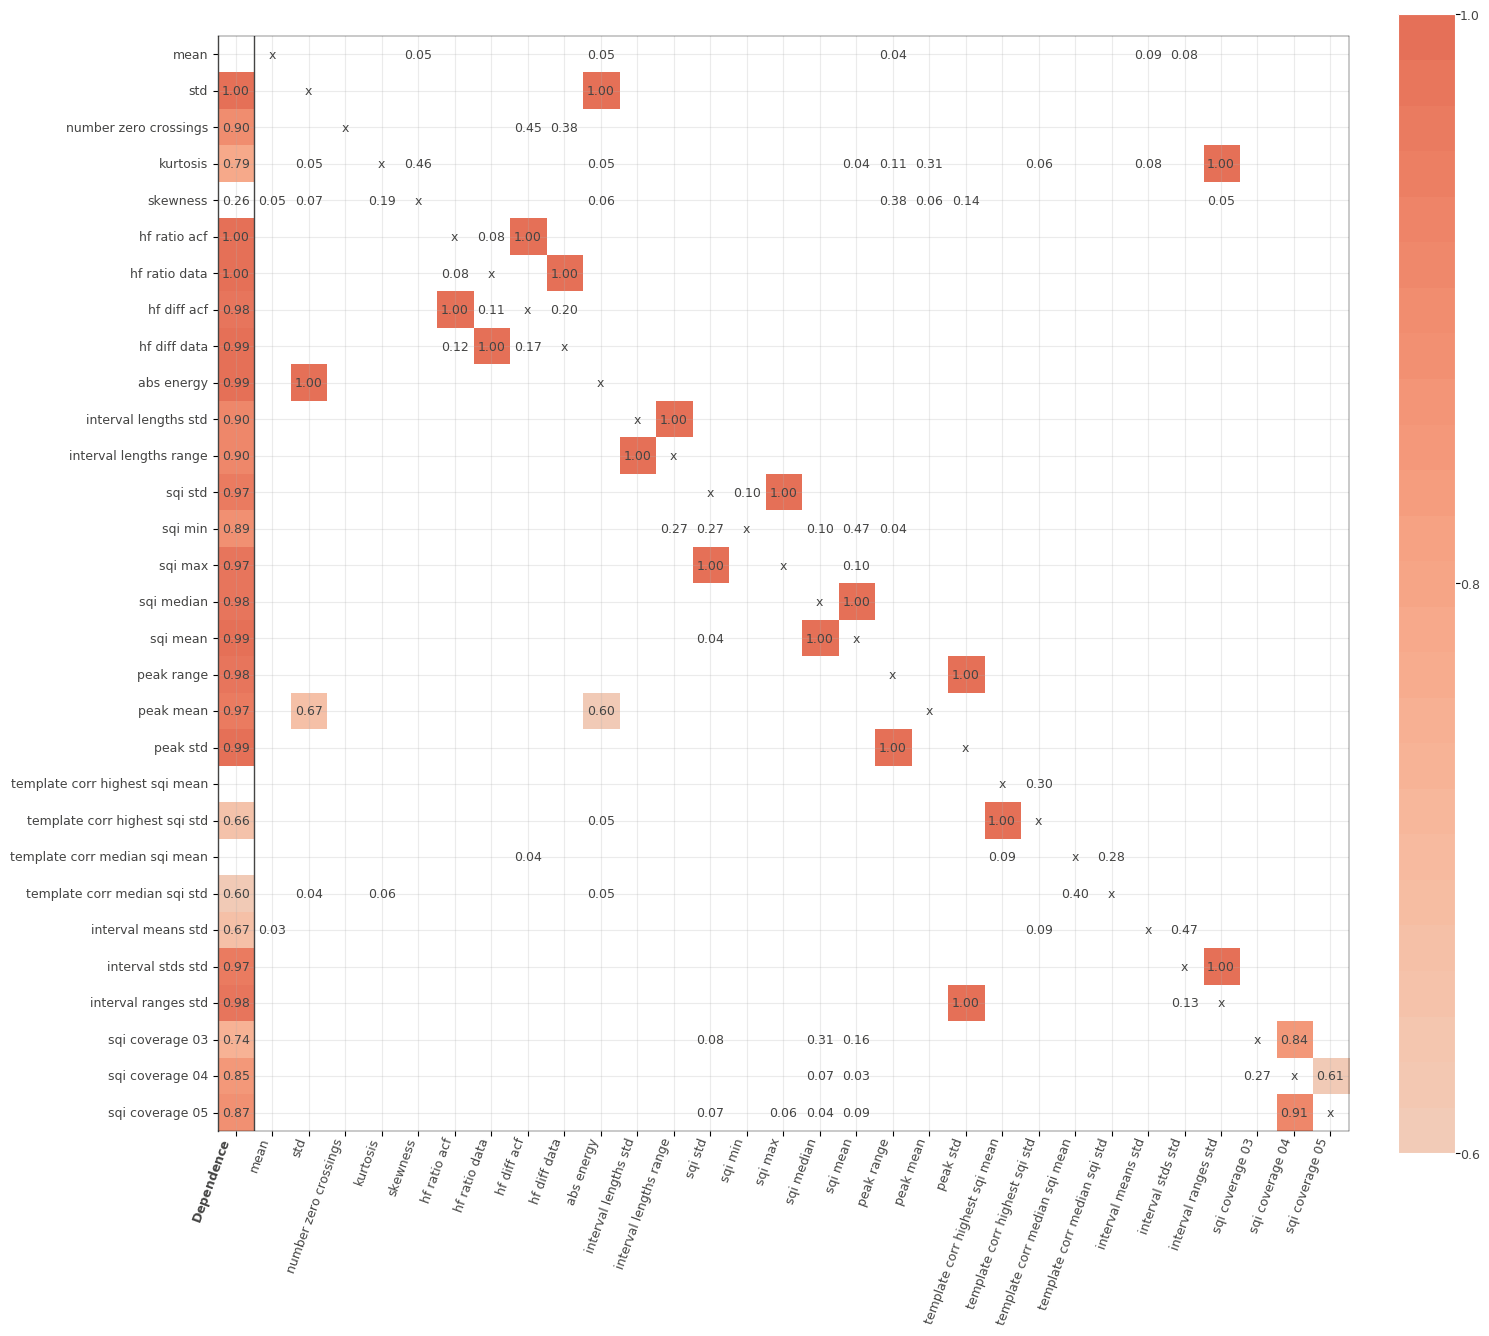

In [8]:
plt.rcParams.update(plt.rcParamsDefault)
rfpimp.plot_dependence_heatmap(fdm, figsize=(15, 15), value_fontsize=9, label_fontsize=9)
plt.rcParams.update(utils.get_plt_settings())

In [9]:
fdm_reduced = rfpimp.feature_dependence_matrix(x_train.drop(['peak range', 'interval ranges std',
                                                             'interval lengths std', 'hf ratio acf', 'hf ratio data',
                                                             'abs energy', 'sqi mean', 'sqi max'],
                                                            axis='columns'))

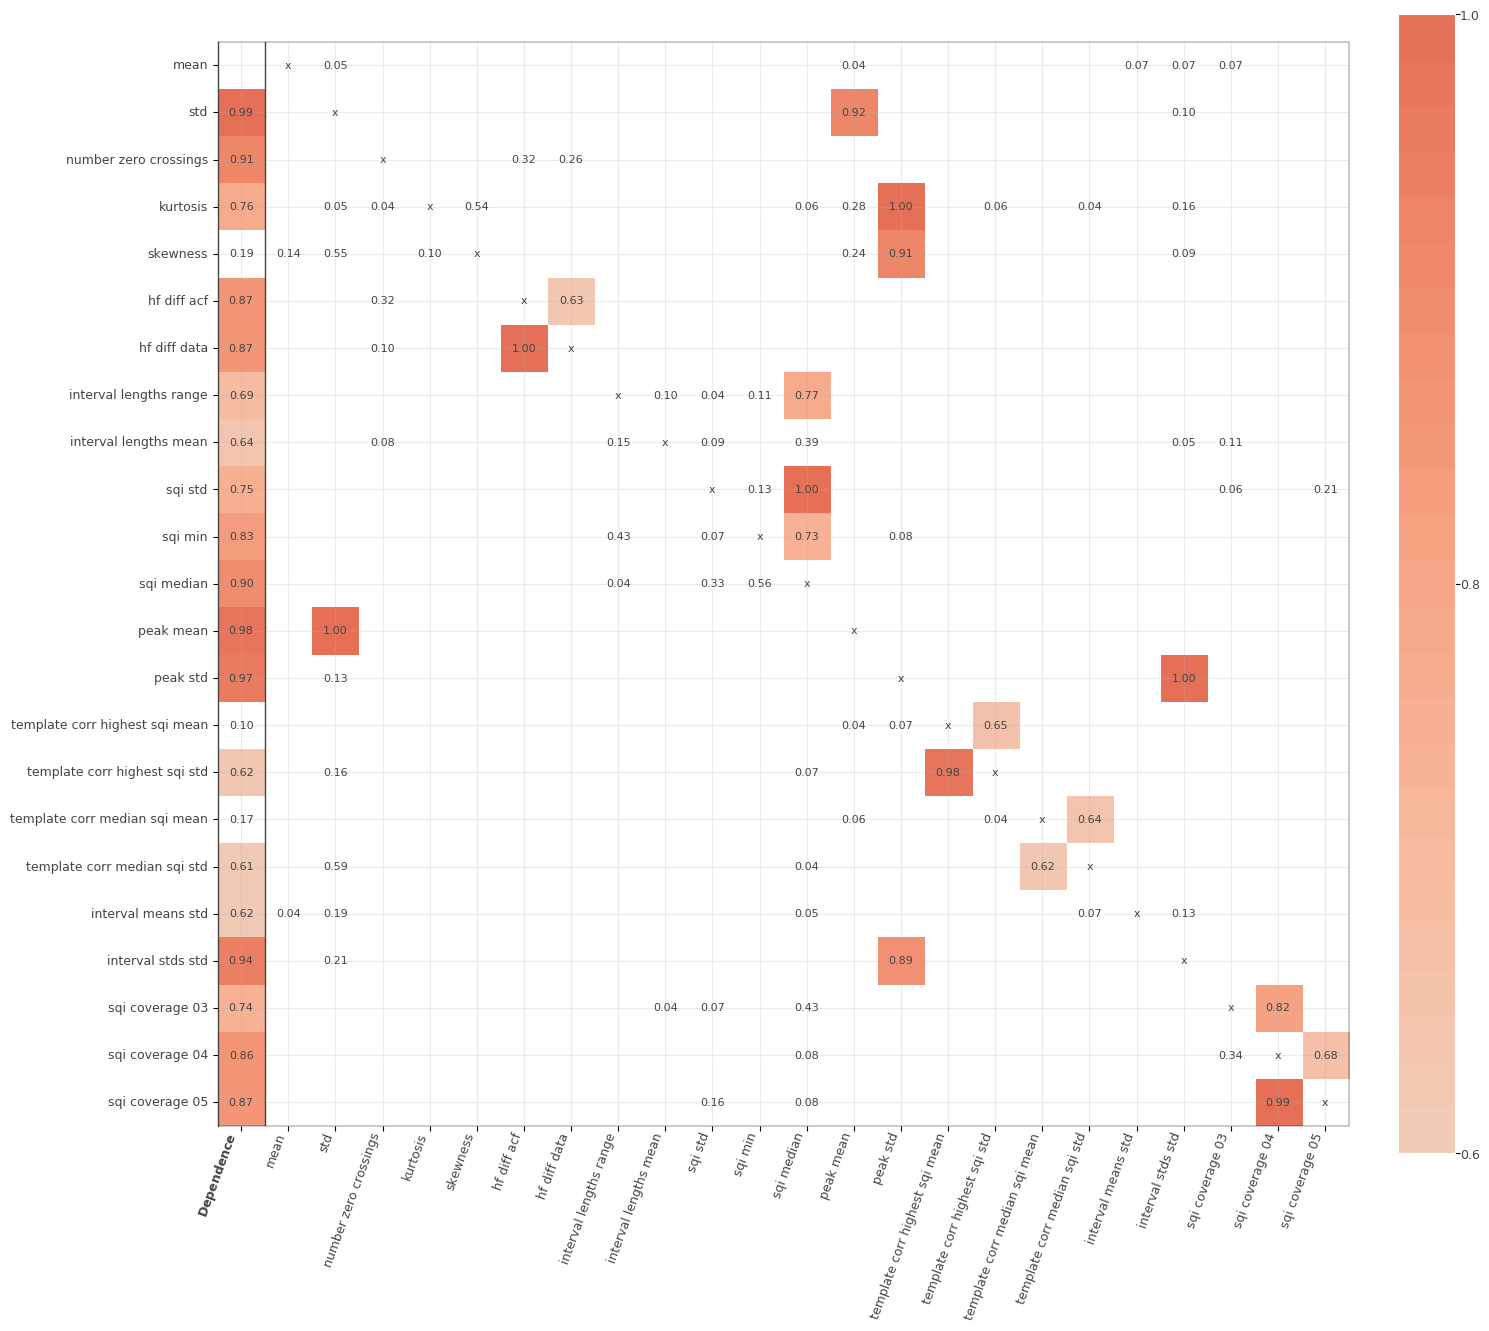

In [10]:
plt.rcParams.update(plt.rcParamsDefault)
rfpimp.plot_dependence_heatmap(fdm_reduced, figsize=(15, 15), value_fontsize=8, label_fontsize=9)
plt.rcParams.update(utils.get_plt_settings())

In [11]:
fdm_reduced_further = rfpimp.feature_dependence_matrix(x_train.drop(['peak range', 'interval ranges std',
                                                                     'interval lengths range', 'hf ratio acf',
                                                                     'hf ratio data', 'abs energy', 'sqi mean',
                                                                     'sqi max', 'std', 'interval stds std'],
                                                            axis='columns'))

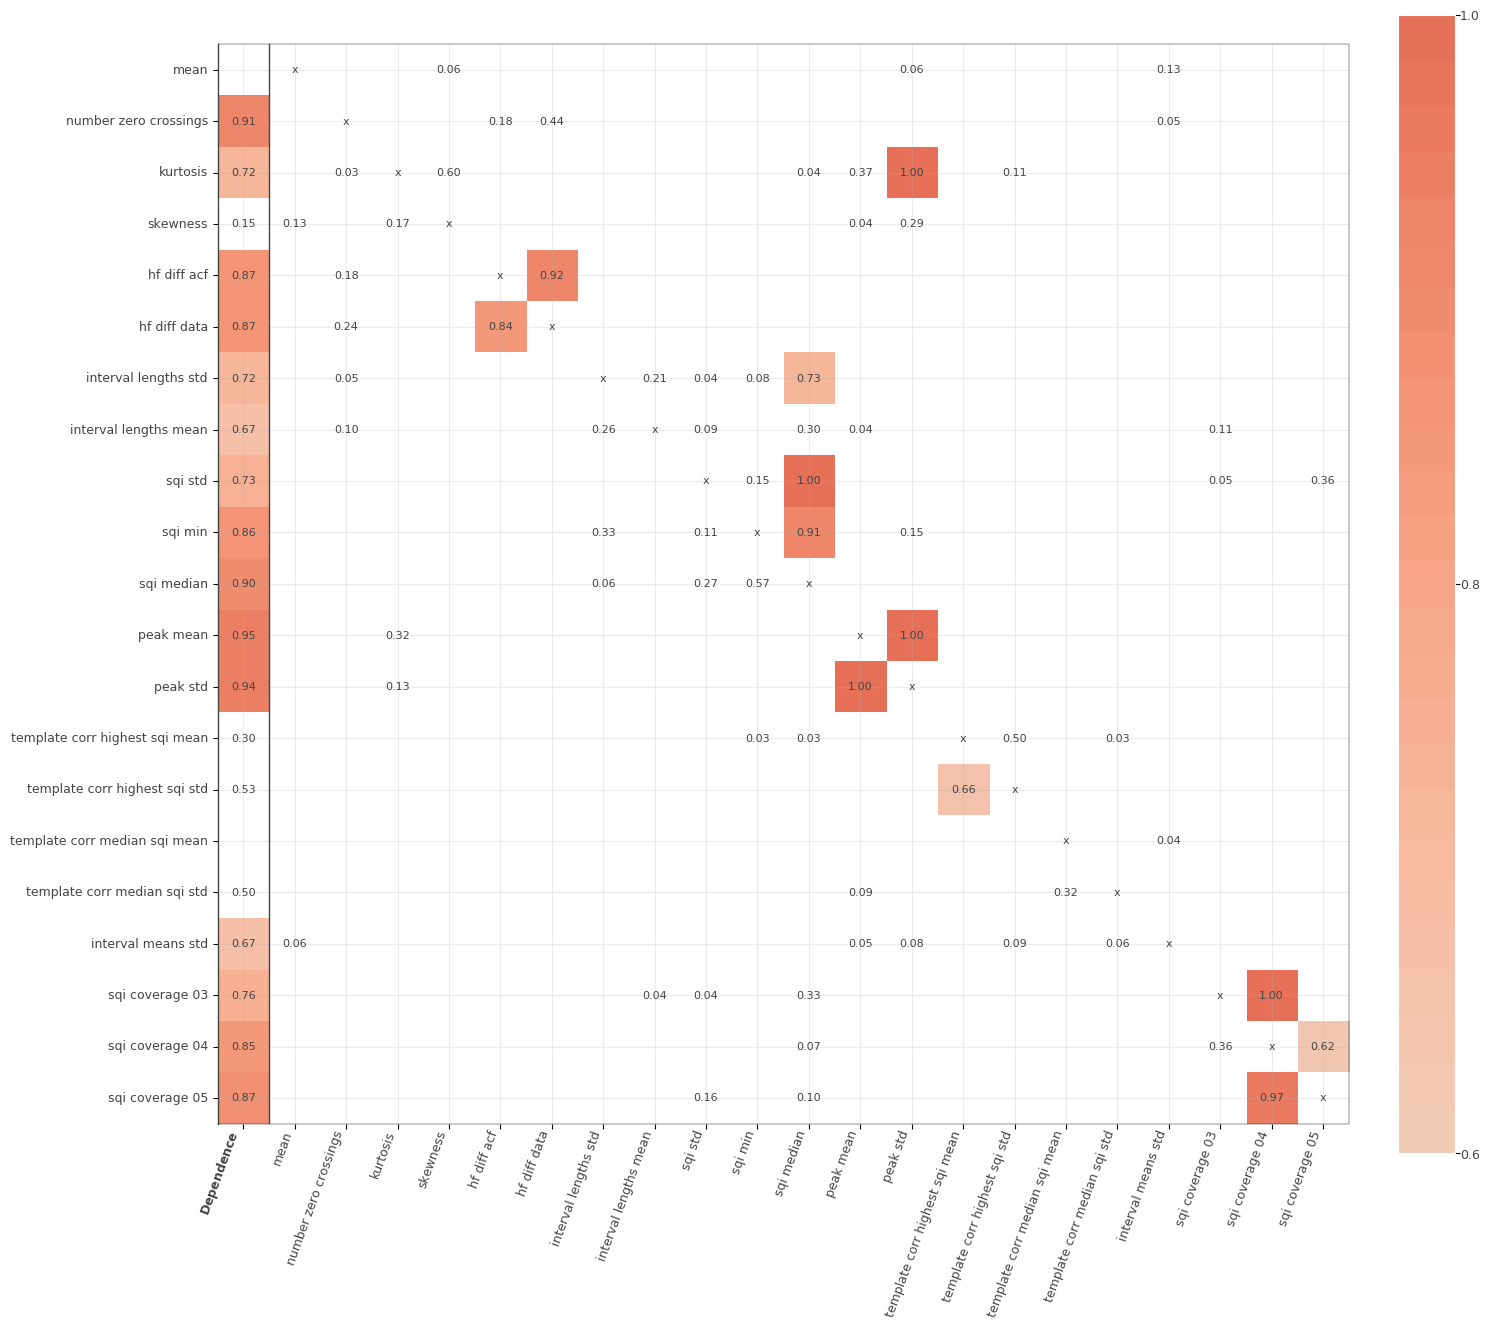

In [12]:
plt.rcParams.update(plt.rcParamsDefault)
rfpimp.plot_dependence_heatmap(fdm_reduced_further, figsize=(15, 15), value_fontsize=8, label_fontsize=9)
plt.rcParams.update(utils.get_plt_settings())

In [4]:
x_train = x_train.drop(['peak range', 'interval ranges std', 'interval lengths range', 'hf ratio acf', 'hf ratio data',
                        'abs energy', 'sqi mean', 'sqi max', 'std', 'interval stds std'], axis='columns')

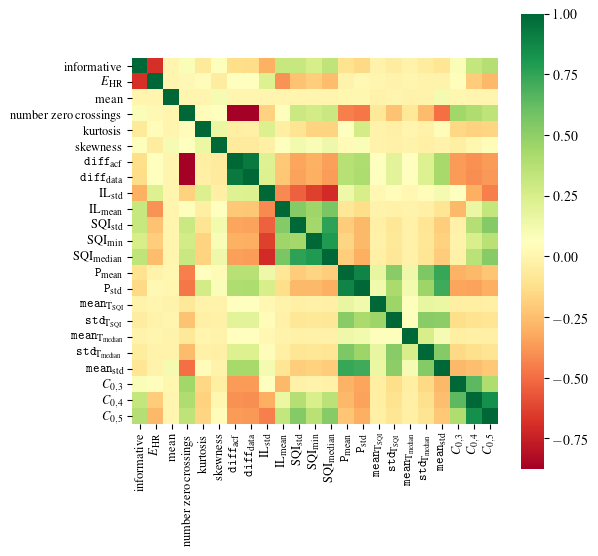

In [20]:
width, _ = utils.get_plt_big_size()
plt.figure(figsize=(width, width))

df_corr = df.drop(['brueser sqi', 'patient id', 'abs err', 'rel err', 'quality class',
                   'brueser coverage', 'bcg hr', 'ecg hr', 'peak range', 'interval ranges std','interval lengths range',
                   'hf ratio acf', 'hf ratio data', 'abs energy', 'sqi mean', 'sqi max', 'std', 'interval stds std'],
                  axis='columns')

df_corr.rename(columns=latex_names, inplace=True)

reduced_corr = sns.heatmap(df_corr.loc[x_train.index].corr(), square=True, cmap ="RdYlGn",
            xticklabels=True, yticklabels=True)
reduced_corr.set_xticklabels(reduced_corr.get_xticklabels(), fontsize=9)
reduced_corr.set_yticklabels(reduced_corr.get_yticklabels(), fontsize=9)
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'corr-heatmap-own-reduced.pdf'), bbox_inches='tight',
                transparent=True, dpi=300)

In [41]:
remaining_cols = ['mean', 'number zero crossings', 'kurtosis', 'skewness', 'hf diff acf', 'hf diff data',
                  'interval lengths std', 'sqi std', 'sqi min', 'sqi median',
                  'peak mean', 'peak std', 'template corr highest sqi mean', 'template corr highest sqi std',
                  'template corr median sqi mean', 'template corr median sqi std','interval means std',
                  'sqi coverage 03', 'sqi coverage 04', 'sqi coverage 05']

# Parallel Coordinates

In [ ]:
from yellowbrick.features import ParallelCoordinates

pc_x = x_test.loc[:, remaining_cols]
pc_x.rename(columns=latex_names, inplace=True)

fig, ax = plt.subplots(figsize=utils.get_plt_big_size())
pc = ParallelCoordinates(classes=["informativ", "nicht informativ"], features=pc_x.columns)
pc.fit(pc_x, y_test)
pc.transform(pc_x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
pc.poof()


# Paarweise geplottet

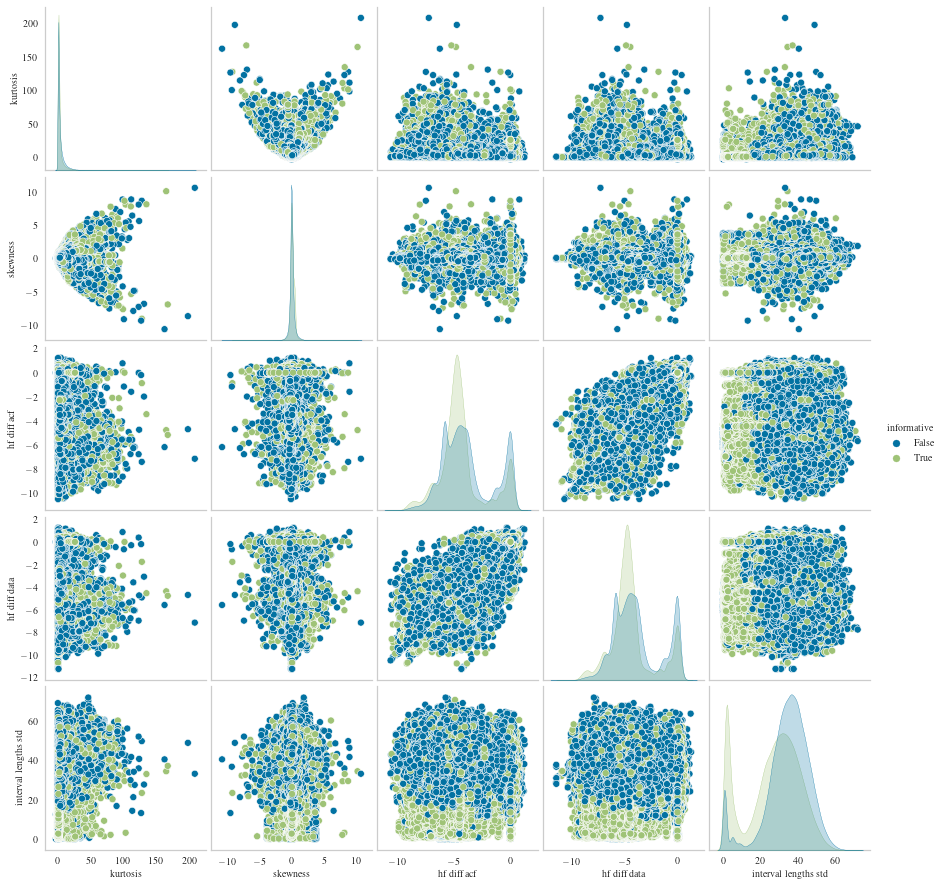

In [43]:
cols = ['kurtosis', 'skewness', 'hf diff acf', 'hf diff data', 'interval lengths std', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)


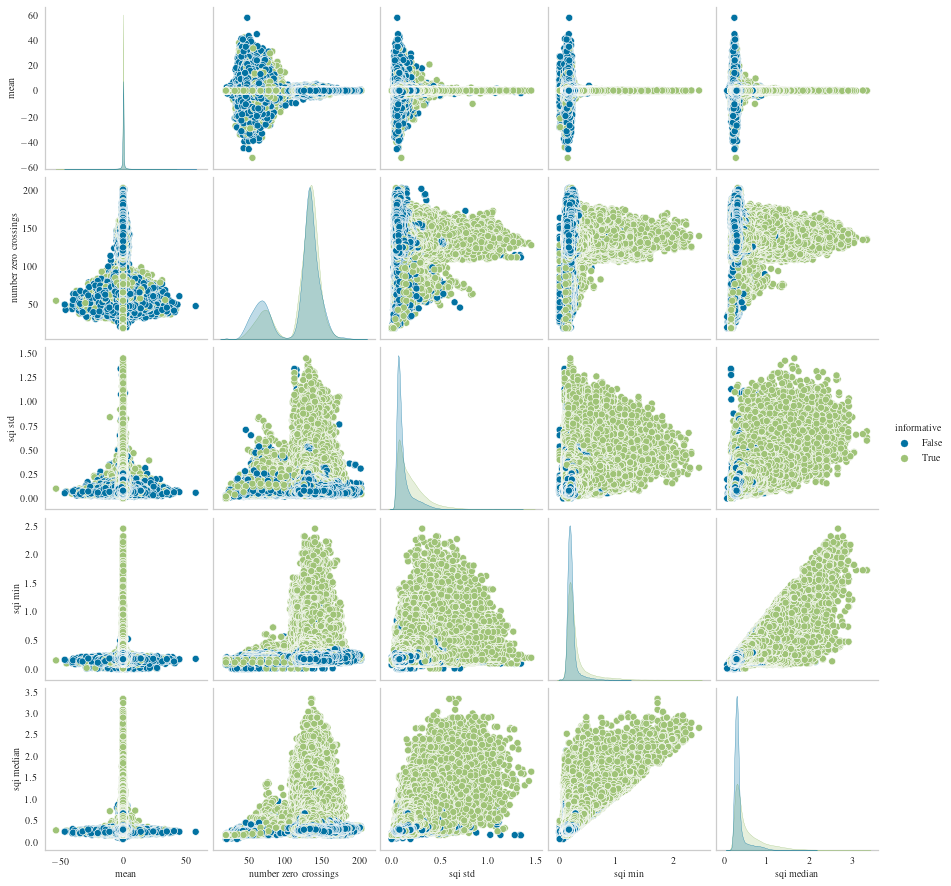

In [44]:
cols = ['mean', 'number zero crossings', 'sqi std', 'sqi min', 'sqi median', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)


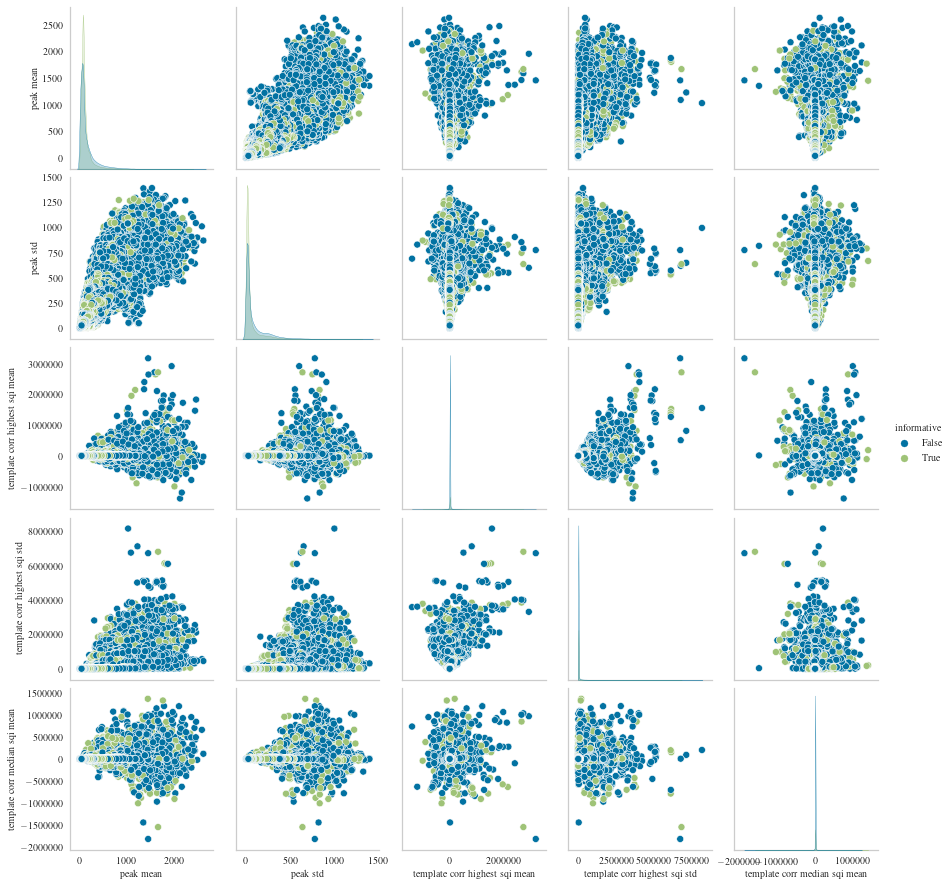

In [45]:
cols = ['peak mean', 'peak std', 'template corr highest sqi mean', 'template corr highest sqi std',
        'template corr median sqi mean', 'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)

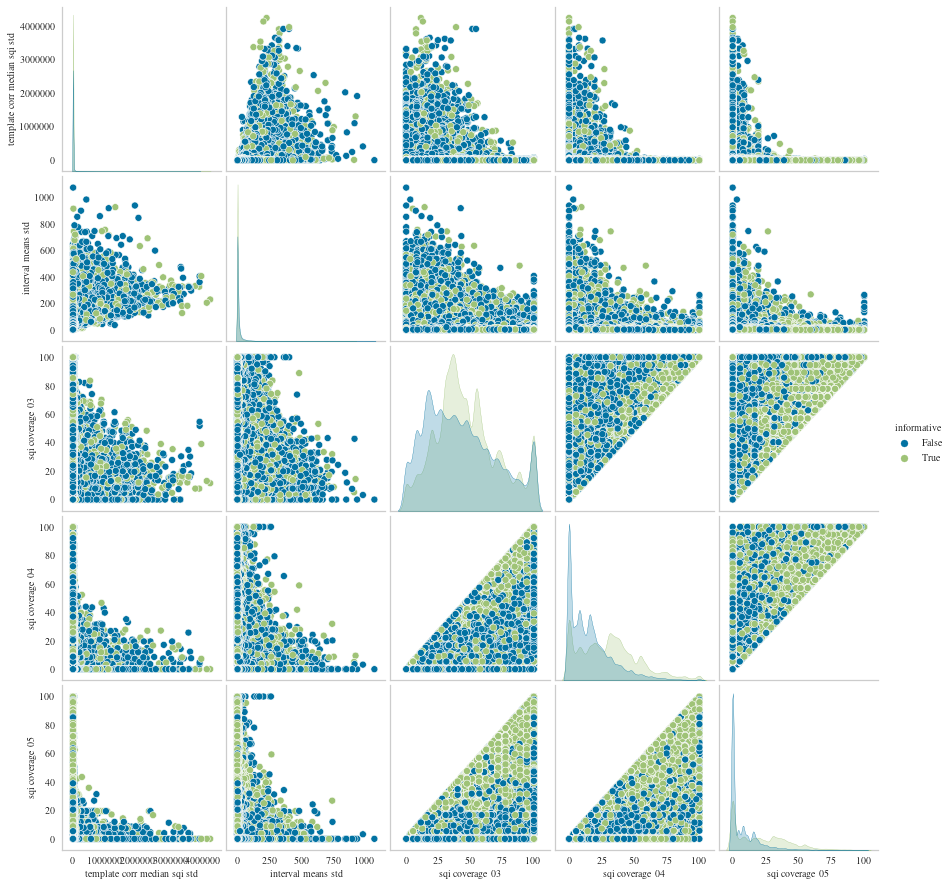

In [47]:
cols = ['template corr median sqi std','interval means std', 'sqi coverage 03', 'sqi coverage 04', 'sqi coverage 05',
        'informative']
sns.pairplot(df.loc[x_train.index, cols], kind='scatter', hue='informative', dropna=True)

# Einfluss der Merkmale bei Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from estimators import OwnEstimatorRegression, OwnEstimatorClassification

In [ ]:
# forest_regr = RandomForestRegressor(random_state=1, n_jobs=-2, verbose=1)
forest_regr = None

rf_regr = OwnEstimatorRegression(forest_regr, path='rf_regr_2010.sav')

In [ ]:
rf_regr.print_model_test_report()

In [ ]:
rf_regr.print_regression_test_report()

In [ ]:
importances = rf_regr.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_regr.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30, rf_regr.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_regr.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_regr.features.columns)), [name.replace("_", " ") for name in rf_regr.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_regr.features.columns)])
plt.tight_layout()
plt.show()

In [23]:
features = ['mean', 'number_zero_crossings', 'kurtosis', 'skewness', 'hf_diff_acf', 'hf_diff_data',
                  'interval_lengths_std', 'sqi_std', 'sqi_min', 'sqi_median',
                  'peak_mean', 'peak_std', 'template_corr_highest_sqi_mean', 'template_corr_highest_sqi_std',
                  'template_corr_median_sqi_mean', 'template_corr_median_sqi_std','interval_means_std',
                  'sqi_coverage_03', 'sqi_coverage_04', 'sqi_coverage_05']
forest_regr_reduced = RandomForestRegressor(random_state=1, n_jobs=-2, verbose=1)
rf_regr_reduced = OwnEstimatorRegression(forest_regr_reduced, path='rf_regr_2610_reduced.sav', feature_selection=features)

Modell is trained, this may need some time


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed: 17.0min finished


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    5.4s finished



 Testset insgesamt
Fehler < 5 FE   : 46.72 %
Fehler < 10 FE   : 55.55 %
Fehler < 15 FE   : 63.17 %
Fehler < 20 FE   : 70.05 %
Fehler = 667 FE : 0.01976 %
                 precision    recall  f1-score   support

non-informative       0.51      0.97      0.67    128211
    informative       0.92      0.25      0.39    160312

       accuracy                           0.57    288523
      macro avg       0.71      0.61      0.53    288523
   weighted avg       0.74      0.57      0.51    288523

MAE auf als informativ klassifizierten Segmenten: 3.95
MAE auf als informativ annotierten Segmenten:  2.51
MAE insgesamt:  15.65
MSE auf als informativ klassifizierten Segmenten: 174.80
MSE auf als informativ annotierten Segmenten:  12.20
MSE insgesamt:  734.96


Coverage klassifiziert      : 14.98 %
Coverage annotiert          : 55.56 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 46.72 %
Fehler < 5 FE klassifiziert    : 13.42 %
Fehler < 1

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    4.3s finished


Max Error: 667.00
MAE: 15.55
MSE: 733.92
R_2 Score: -0.50


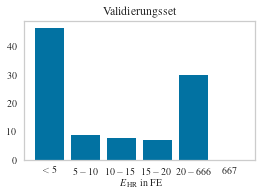

<Figure size 297.644x183.958 with 0 Axes>

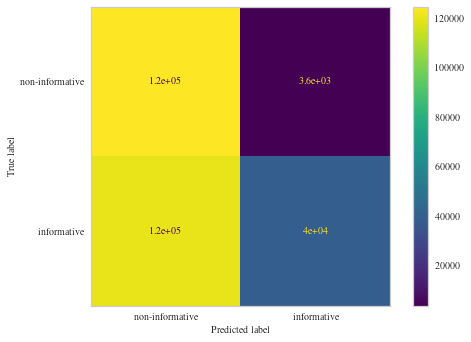

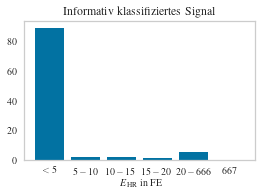

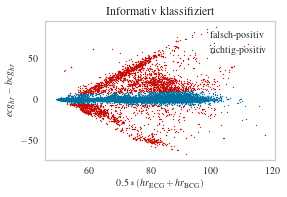

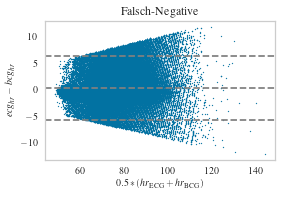

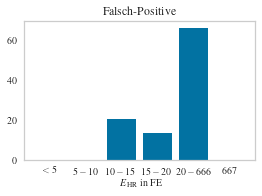

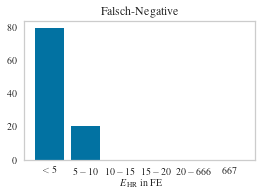

In [24]:
rf_regr_reduced.print_model_test_report()
rf_regr_reduced.print_regression_test_report()

 1) sqi_median                     0.164622
 2) hf_diff_acf                    0.084919
 3) hf_diff_data                   0.083307
 4) sqi_coverage_03                0.081252
 5) peak_mean                      0.080538
 6) number_zero_crossings          0.057057
 7) sqi_std                        0.048503
 8) interval_lengths_std           0.045321
 9) sqi_min                        0.044680
10) kurtosis                       0.038905
11) skewness                       0.038534
12) peak_std                       0.032695
13) interval_means_std             0.030242
14) template_corr_median_sqi_std   0.029600
15) template_corr_highest_sqi_std  0.029511
16) template_corr_highest_sqi_mean 0.027281
17) template_corr_median_sqi_mean  0.026664
18) mean                           0.021831
19) sqi_coverage_04                0.020390
20) sqi_coverage_05                0.014146


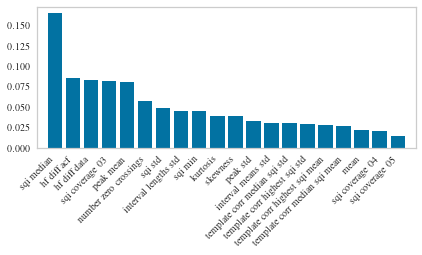

In [25]:
importances = rf_regr_reduced.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_regr_reduced.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30,rf_regr_reduced.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_regr_reduced.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_regr_reduced.features.columns)), [name.replace("_", " ") for name in rf_regr_reduced.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_regr_reduced.features.columns)])
plt.tight_layout()
plt.show()

In [18]:
features = ['mean', 'number_zero_crossings', 'kurtosis', 'skewness', 'hf_diff_acf', 'hf_diff_data',
                  'interval_lengths_std', 'sqi_std', 'sqi_min', 'sqi_median',
                  'peak_mean', 'peak_std', 'template_corr_highest_sqi_mean', 'template_corr_highest_sqi_std',
                  'template_corr_median_sqi_mean', 'template_corr_median_sqi_std','interval_means_std',
                  'sqi_coverage_03', 'sqi_coverage_04', 'sqi_coverage_05']
forest_clf_reduced = RandomForestClassifier(random_state=1, n_jobs=-2, verbose=1)
rf_clf_reduced = OwnEstimatorClassification(forest_clf_reduced, path='rf_clf_2610_reduced.sav', feature_selection=features)

Modell is trained, this may need some time


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  3.0min finished


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.3s finished



 Testset insgesamt
Fehler < 5 FE   : 46.72 %
Fehler < 10 FE   : 55.55 %
Fehler < 15 FE   : 63.17 %
Fehler < 20 FE   : 70.05 %
Fehler = 667 FE : 0.01976 %
                 precision    recall  f1-score   support

non-informative       0.58      0.83      0.68    128211
    informative       0.79      0.52      0.63    160312

       accuracy                           0.66    288523
      macro avg       0.68      0.67      0.66    288523
   weighted avg       0.70      0.66      0.65    288523

MAE auf als informativ klassifizierten Segmenten: 8.14
MAE auf als informativ annotierten Segmenten:  2.51
MAE insgesamt:  15.65
MSE auf als informativ klassifizierten Segmenten: 360.36
MSE auf als informativ annotierten Segmenten:  12.20
MSE insgesamt:  734.96


Coverage klassifiziert      : 36.71 %
Coverage annotiert          : 55.56 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 46.72 %
Fehler < 5 FE klassifiziert    : 27.26 %
Fehler < 1

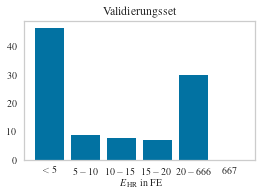

<Figure size 297.644x183.958 with 0 Axes>

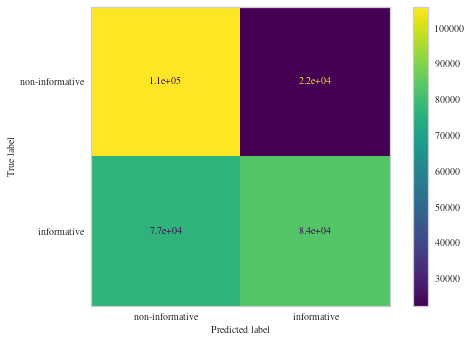

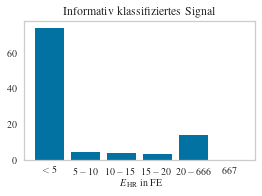

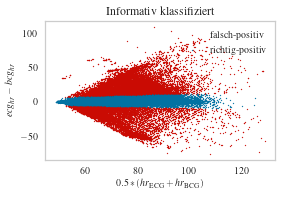

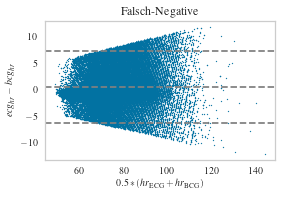

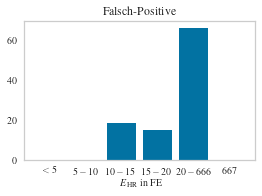

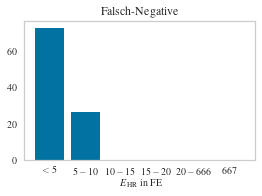

In [19]:
rf_clf_reduced.print_model_test_report()

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    3.7s finished


<Figure size 297.644x183.958 with 0 Axes>

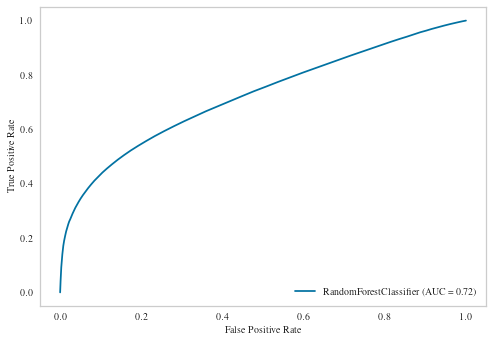

In [20]:
from sklearn.metrics import plot_roc_curve

x1, x2, y1, y2, groups1, groups2 = rf_clf_reduced._get_patient_split()
plt.figure(figsize=utils.get_plt_normal_size())
x2 = x2.dropna()
y2 = y2.loc[x2.index]
plot_roc_curve(rf_clf_reduced.clf, x2, y2)

 1) sqi_median                     0.105429
 2) sqi_coverage_05                0.070543
 3) hf_diff_acf                    0.059481
 4) interval_lengths_std           0.059256
 5) sqi_std                        0.058697
 6) sqi_coverage_04                0.058057
 7) hf_diff_data                   0.057991
 8) peak_mean                      0.055294
 9) sqi_coverage_03                0.054010
10) sqi_min                        0.047936
11) skewness                       0.045656
12) peak_std                       0.043673
13) kurtosis                       0.041687
14) number_zero_crossings          0.041067
15) interval_means_std             0.036432
16) template_corr_highest_sqi_std  0.036364
17) template_corr_median_sqi_std   0.035611
18) template_corr_highest_sqi_mean 0.032043
19) template_corr_median_sqi_mean  0.031855
20) mean                           0.028919


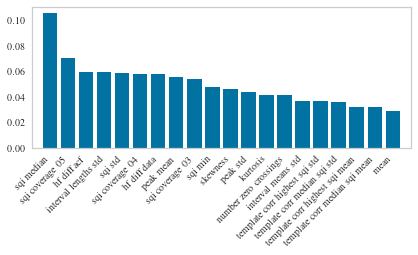

In [21]:
importances = rf_clf_reduced.clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(rf_clf_reduced.features.columns)):
    print("%2d) %-*s %f" % (f + 1, 30,rf_clf_reduced.features.columns[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(rf_clf_reduced.features.columns)), importances[indices], align='center')
plt.xticks(range(len(rf_clf_reduced.features.columns)), [name.replace("_", " ") for name in rf_clf_reduced.features.columns[indices]], rotation=45, ha="right")
plt.xlim([-1, len(rf_clf_reduced.features.columns)])
plt.tight_layout()
plt.show()